In [1]:
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

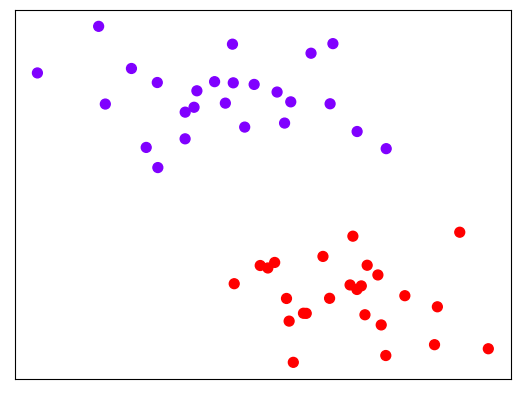

In [2]:
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.6)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow')
plt.xticks([])
plt.yticks([])
plt.show()

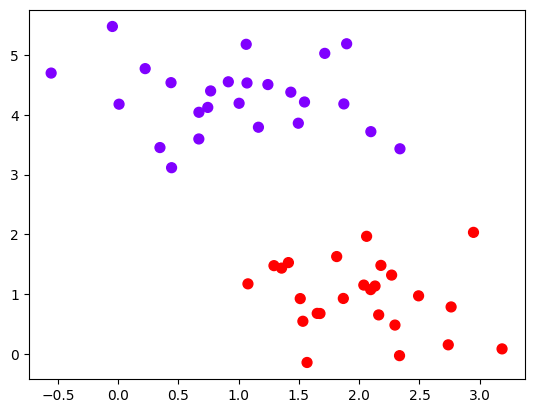

In [3]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow')
ax = plt.gca()  # 获取当前子图，如果不存在，则创建新的子图

In [4]:
# 获取平面上两条坐标轴的最大值和最小值
xlim = ax.get_xlim()
ylim = ax.get_ylim()

In [5]:
# 在最大值和最小值之间形成30个规律的数据
axisx = np.linspace(xlim[0], xlim[1], 30)
axisy = np.linspace(xlim[0], xlim[1], 30)

In [6]:
axisy, axisx = np.meshgrid(axisy, axisx)
# 我们将使用这里形成的二维数组作为我们contour函数中的X和Y
# 使用meshgrid函数将两个一维向量转换为特征矩阵
# 核心是将两个特征向量广播，以便获取y.shape * x.shape这么多个坐标点的横坐标和纵坐标

In [7]:
xy = np.vstack([axisx.ravel(), axisy.ravel()]).T
# 其中ravel()是降维函数，vstack能够将多个结构一致的一维数组按行堆叠起来
# xy就是已经形成的网格，它是遍布在整个画布上的密集的点

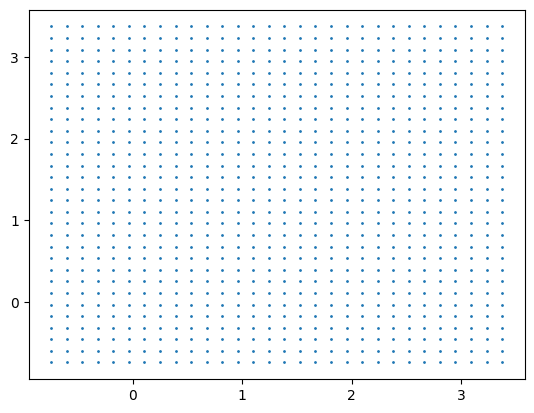

In [8]:
plt.scatter(xy[:, 0], xy[:, 1], s=1, cmap='rainbow')

In [9]:
# 建模，通过fit计算出对应的决策边界
clf = SVC(kernel='linear').fit(X, y)
Z = clf.decision_function(xy).reshape(axisx.shape)
# 重要接口decision_function，返回每个输入的样本所对应的到决策边界的距离
# 然后再将这个距离转换为axisx的结构，这是由于画图的函数contour要求Z的结构必须与X和Y保持一致

(-0.41872382476349596, 5.754870487889891)

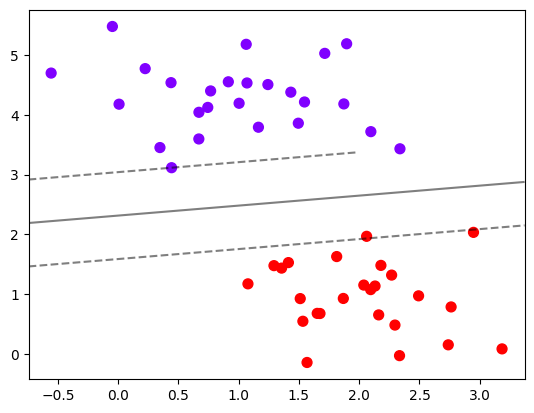

In [12]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow')
ax = plt.gca()  # 获取当前子图，如果不存在，则创建新的子图
# 画决策边界和平行于决策边界的超平面
ax.contour(
    axisx, axisy, Z
    , colors='k'
    , levels=[-1, 0, 1]
    , alpha=0.5
    , linestyles=['--', '-', '--']
)
ax.set_xlim(xlim)
ax.set_ylim(ylim)

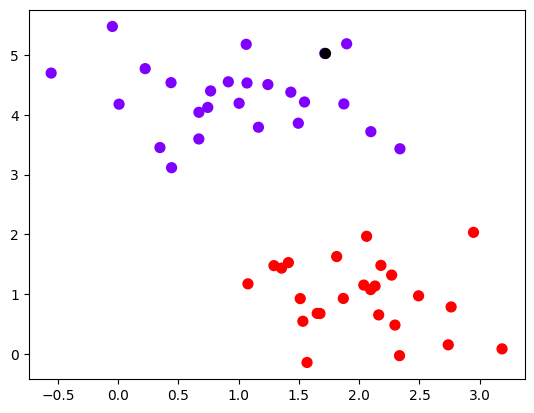

In [13]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow')
plt.scatter(X[10, 0], X[10, 1], c='black', s=50, cmap='rainbow')

In [14]:
clf.decision_function(X[10].reshape(1, 2))

array([-3.33917354])

C:\Users\25338\AppData\Local\Temp\ipykernel_2184\1459697070.py:3: UserWarning: No contour levels were found within the data range.
  ax.contour(


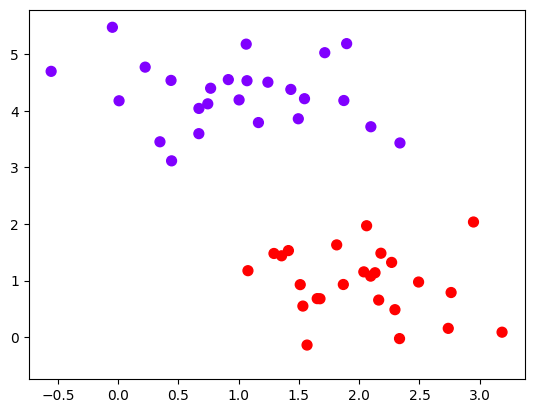

In [35]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap="rainbow")
ax = plt.gca()
ax.contour(
    axisx, axisy, Z
    , colors='k'
    , levels=[ylim[0] - 3.33917354]
    , alpha=0.5
    , linestyles=['--']
)

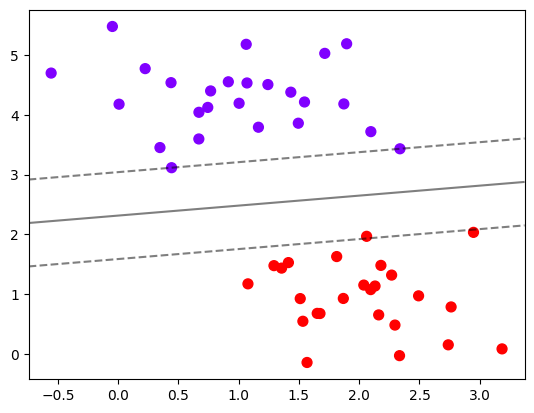

In [36]:
#将上述过程包装成函数：
def plot_svc_decision_function(model, ax=None):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    ax.contour(X, Y, P, colors="k", levels=[-1, 0, 1], alpha=0.5, linestyles=["--", "-", "--"])
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)


#则整个绘图过程可以写作：
clf = SVC(kernel="linear").fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap="rainbow")
plot_svc_decision_function(clf)

In [37]:
clf.predict(X)
#根据决策边界，对X中的样本进行分类，返回的结构为n_samples

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0])

In [38]:
clf.score(X, y)
#返回给定测试数据和标签的平均准确度

1.0

In [39]:
clf.support_vectors_
#返回支持向量

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

In [40]:
clf.n_support_
#返回每个类中支持向量的个数

array([2, 1])

In [41]:
from sklearn.datasets import make_circles

X, y = make_circles(100, factor=0.1, noise=.1)

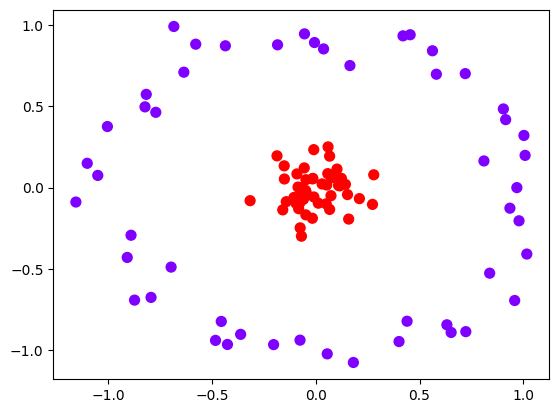

In [43]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap="rainbow")
plt.show()

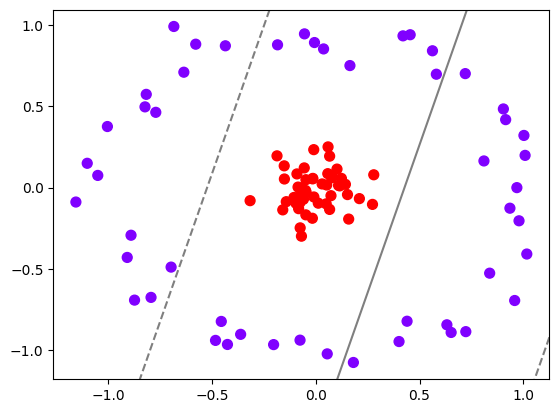

In [44]:
clf = SVC(kernel="linear").fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap="rainbow")
plot_svc_decision_function(clf)

In [45]:
clf.score(X, y)

0.68

In [46]:
# 定义一个由x计算出来的新维度r
r = np.exp(-(X ** 2).sum(1))

In [48]:
rlim = np.linspace(min(r), max(r), 100)

In [49]:
rlim.shape

(100,)

In [50]:
rlim

array([0.23447517, 0.24219297, 0.24991076, 0.25762856, 0.26534636,
       0.27306416, 0.28078196, 0.28849975, 0.29621755, 0.30393535,
       0.31165315, 0.31937095, 0.32708875, 0.33480654, 0.34252434,
       0.35024214, 0.35795994, 0.36567774, 0.37339553, 0.38111333,
       0.38883113, 0.39654893, 0.40426673, 0.41198452, 0.41970232,
       0.42742012, 0.43513792, 0.44285572, 0.45057352, 0.45829131,
       0.46600911, 0.47372691, 0.48144471, 0.48916251, 0.4968803 ,
       0.5045981 , 0.5123159 , 0.5200337 , 0.5277515 , 0.5354693 ,
       0.54318709, 0.55090489, 0.55862269, 0.56634049, 0.57405829,
       0.58177608, 0.58949388, 0.59721168, 0.60492948, 0.61264728,
       0.62036507, 0.62808287, 0.63580067, 0.64351847, 0.65123627,
       0.65895407, 0.66667186, 0.67438966, 0.68210746, 0.68982526,
       0.69754306, 0.70526085, 0.71297865, 0.72069645, 0.72841425,
       0.73613205, 0.74384984, 0.75156764, 0.75928544, 0.76700324,
       0.77472104, 0.78243884, 0.79015663, 0.79787443, 0.80559

In [51]:
from mpl_toolkits import mplot3d

In [53]:
#定义一个绘制三维图像的函数
#elev表示上下旋转的角度
#azim表示平行旋转的角度
def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='rainbow')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')
    plt.show()

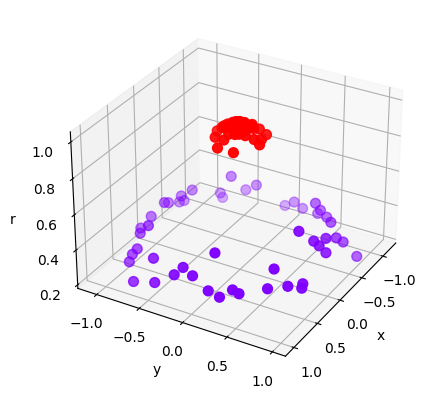

In [54]:
plot_3D()

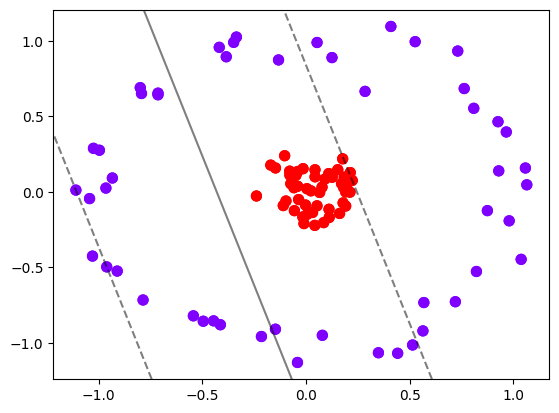

interactive(children=(Dropdown(description='elev', index=1, options=(0, 30), value=30), IntSlider(value=30, de…

In [57]:
#如果放到jupyter notebook中运行
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_circles

X, y = make_circles(100, factor=0.1, noise=.1)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap="rainbow")


def plot_svc_decision_function(model, ax=None):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    ax.contour(X, Y, P, colors="k", levels=[-1, 0, 1], alpha=0.5, linestyles=["--", "-", "--"])
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)


clf = SVC(kernel="linear").fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap="rainbow")
plot_svc_decision_function(clf)
r = np.exp(-(X ** 2).sum(1))
rlim = np.linspace(min(r), max(r), 100)
from mpl_toolkits import mplot3d


def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection="3d")
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='rainbow')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("r")
    plt.show()


from ipywidgets import interact, fixed

interact(plot_3D, elev=[0, 30], azip=(-180, 180), X=fixed(X), y=fixed(y))
plt.show()

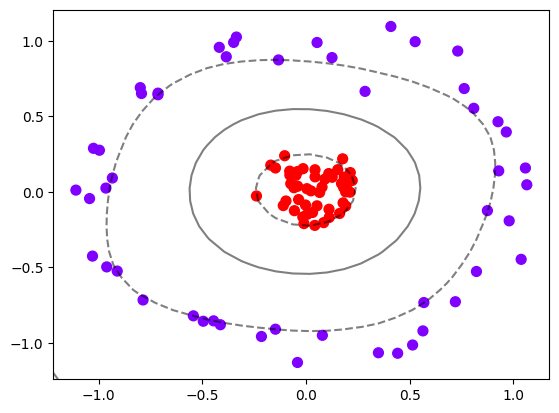

In [58]:
clf = SVC(kernel='rbf').fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow')
plot_svc_decision_function(clf)